In [14]:
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import FactorAnalysis

In [15]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
urllib.request.urlretrieve(url, 'ayame.txt')

('ayame.txt', <http.client.HTTPMessage at 0x25b5a51a588>)

In [16]:
df = pd.read_csv('ayame.txt', sep='\t', index_col=0)

In [17]:
dfa = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)
del dfa['Species']
dfa = dfa.T

In [18]:
df0 = dfa.iloc[:,0:50]
df1 = dfa.iloc[:,50:100]
df2 = dfa.iloc[:,100:150]

In [19]:
fa = FactorAnalysis()#python上で因子分析（個体間）
fa.fit(dfa)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [20]:
pd.DataFrame(fa.components_, columns=dfa.columns)

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
0,0.965757,0.495179,0.724117,0.616434,1.075193,1.254462,0.900860,0.868141,0.451401,0.604725,...,-0.490718,-0.441153,-0.630274,-0.412248,-0.324918,-0.527826,-0.871908,-0.442582,-0.099273,-0.324619
1,0.051965,0.012002,-0.105193,-0.152689,-0.009108,0.067322,-0.218372,0.009421,-0.222922,0.030723,...,-0.098783,0.060054,-0.293997,-0.040632,-0.162628,-0.031823,-0.018899,-0.024252,-0.335354,-0.244474
2,0.000716,-0.000125,0.016064,0.067594,0.019718,-0.030159,0.023351,0.030433,0.061587,0.066316,...,-0.180265,-0.277159,0.004931,-0.083649,-0.186431,-0.233990,-0.095242,-0.089852,-0.100905,0.047204
3,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
pd.DataFrame(fa.components_, columns=dfa.columns).apply(lambda x: x**2).apply(np.sum, axis=1)#因子寄与

0    71.839902
1     6.520593
2     0.974099
3     0.000000
dtype: float64

In [22]:
pd.DataFrame(fa.components_, columns=dfa.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1)#寄与率

0    0.478933
1    0.043471
2    0.006494
3    0.000000
dtype: float64

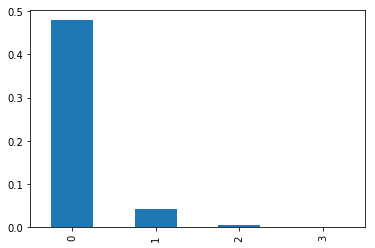

In [23]:
pd.DataFrame(fa.components_, columns=dfa.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1).plot.bar()#寄与率

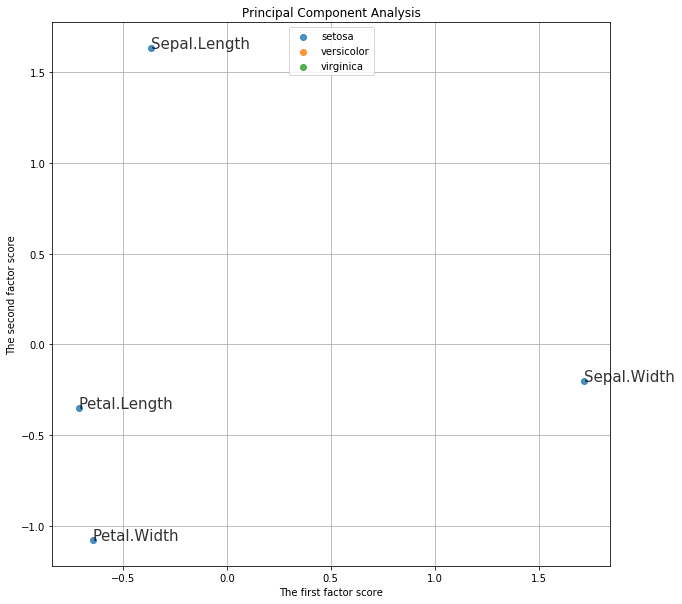

In [24]:
pd.DataFrame(fa.transform(dfa))
transformed = fa.transform(dfa)
plt.figure(figsize=(10, 10))
for x, y, name in zip(transformed[:, 0], transformed[:, 1], dfa.index):
    plt.text(x, y, name, alpha=0.8, size=15)
plt.scatter(transformed[0:50, 0],transformed[0:50, 1], alpha=0.8,label = 'setosa')
plt.scatter(transformed[50:100, 0],transformed[50:100, 1], alpha=0.8, label = 'versicolor')
plt.scatter(transformed[100:150, 0],transformed[100:150, 1], alpha=0.8, label = 'virginica')
plt.title("Principal Component Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.legend(loc='upper center')
plt.grid()
plt.show()

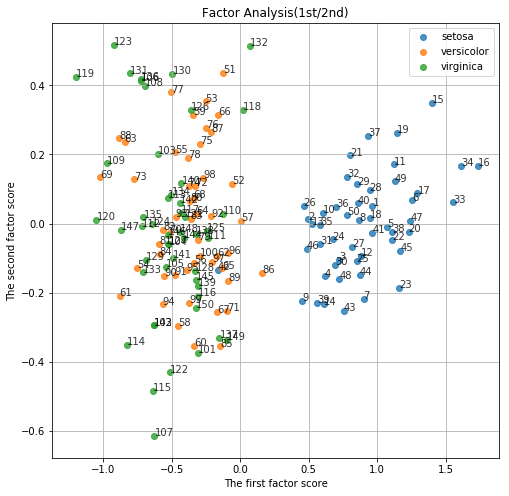

In [25]:
#第一因子、第二因子間でプロット
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_.T[:, 0], fa.components_.T[:, 1], dfa.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(fa.components_.T[0:50, 0],fa.components_.T[0:50, 1], alpha=0.8,label = 'setosa')
plt.scatter(fa.components_.T[50:100, 0],fa.components_.T[50:100, 1], alpha=0.8, label = 'versicolor')
plt.scatter(fa.components_.T[100:150, 0],fa.components_.T[100:150, 1], alpha=0.8, label = 'virginica')
plt.title("Factor Analysis(1st/2nd)")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

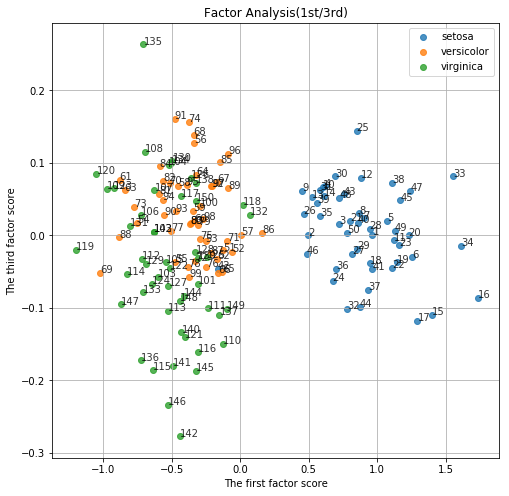

In [26]:
#第一因子、第三因子間でプロット
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_.T[:, 0], fa.components_.T[:, 2], dfa.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(fa.components_.T[0:50, 0], fa.components_.T[0:50, 2], alpha=0.8, label = 'setosa')
plt.scatter(fa.components_.T[50:100, 0], fa.components_.T[50:100, 2], alpha=0.8,label = 'versicolor')
plt.scatter(fa.components_.T[100:150, 0], fa.components_.T[100:150, 2], alpha=0.8,label = 'virginica')
plt.title("Factor Analysis(1st/3rd)")
plt.xlabel("The first factor score")
plt.ylabel("The third factor score")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

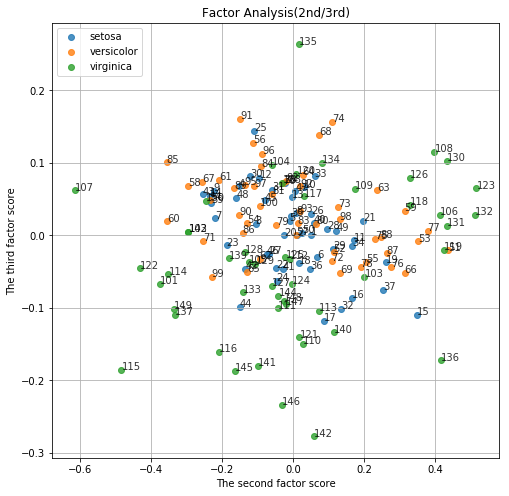

In [27]:
plt.figure(figsize=(8, 8))#第二因子、第三因子間でプロット
for x, y, name in zip(fa.components_.T[:, 1], fa.components_.T[:, 2], dfa.columns):
    plt.text(x, y, name, alpha=0.8, size=10)
plt.scatter(fa.components_.T[0:50, 1], fa.components_.T[0:50, 2], alpha=0.8, label = 'setosa')
plt.scatter(fa.components_.T[50:100, 1], fa.components_.T[50:100, 2], alpha=0.8,label = 'versicolor')
plt.scatter(fa.components_.T[100:150, 1], fa.components_.T[100:150, 2], alpha=0.8,label = 'virginica')
plt.title("Factor Analysis(2nd/3rd)")
plt.xlabel("The second factor score")
plt.ylabel("The third factor score")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [28]:
dfb = df.apply(lambda x: (x-x.mean())/x.std(), axis=0)#pythonで因子分析（要素間）
del dfb['Species']
fa = FactorAnalysis()
fa.fit(dfb)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [29]:
pd.DataFrame(fa.components_, columns=dfb.columns)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.835983,-0.363555,0.916859,0.898501
1,0.122061,0.337464,-0.019113,-0.008899
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


In [30]:
pd.DataFrame(fa.components_, columns=dfb.columns).apply(lambda x: x**2).apply(np.sum, axis=0)

Sepal.Length    0.713766
Sepal.Width     0.246054
Petal.Length    0.840995
Petal.Width     0.807384
dtype: float64

In [31]:
pd.DataFrame(fa.components_, columns=dfb.columns).apply(lambda x: x**2).apply(np.sum, axis=1)#寄与

0    2.478974
1    0.129225
2    0.000000
3    0.000000
dtype: float64

In [32]:
pd.DataFrame(fa.components_, columns=dfb.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1)#寄与率

0    0.619743
1    0.032306
2    0.000000
3    0.000000
dtype: float64

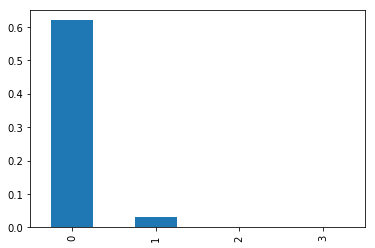

In [33]:
pd.DataFrame(fa.components_, columns=dfb.columns).apply(lambda x: x**2 / len(fa.components_.T)).apply(np.sum, axis=1).plot.bar()#寄与率

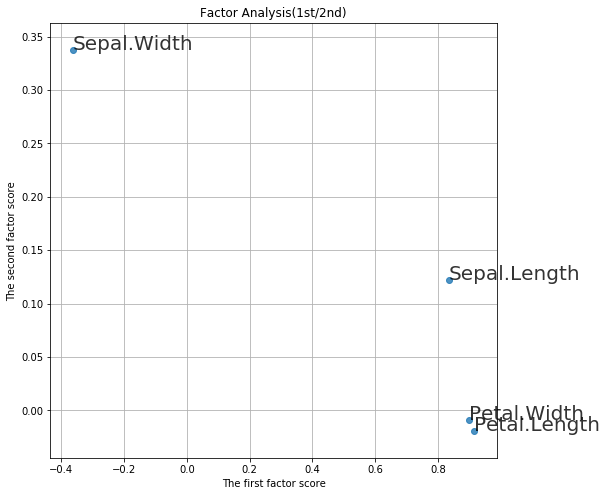

In [34]:
#要素間因子分析結果
plt.figure(figsize=(8, 8))
for x, y, name in zip(fa.components_.T[:, 0], fa.components_.T[:, 1], dfb.columns):
    plt.text(x, y, name, alpha=0.8, size=20)
plt.scatter(fa.components_.T[0:50, 0],fa.components_.T[0:50, 1], alpha=0.8,label = 'setosa')
plt.scatter(fa.components_.T[50:100, 0],fa.components_.T[50:100, 1], alpha=0.8, label = 'versicolor')
plt.scatter(fa.components_.T[100:150, 0],fa.components_.T[100:150, 1], alpha=0.8, label = 'virginica')
plt.title("Factor Analysis(1st/2nd)")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.grid(True)
plt.show()

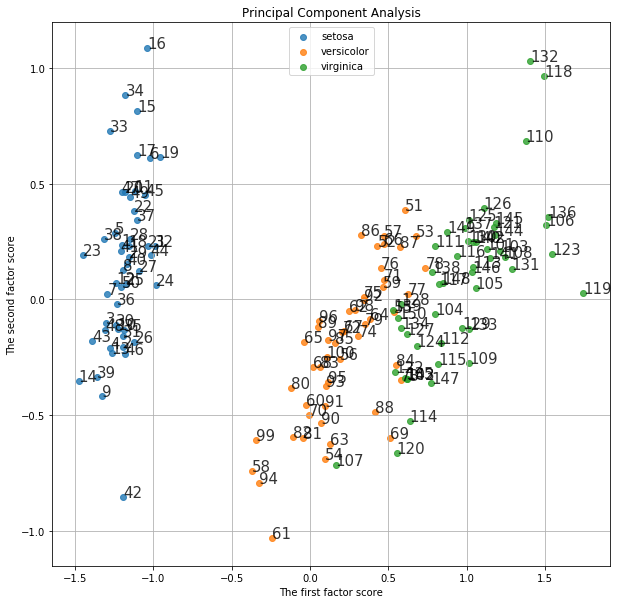

In [35]:
pd.DataFrame(fa.transform(dfb))
transformed = fa.transform(dfb)
plt.figure(figsize=(10, 10))
for x, y, name in zip(transformed[:, 0], transformed[:, 1], dfb.index):
    plt.text(x, y, name, alpha=0.8, size=15)
plt.scatter(transformed[0:50, 0],transformed[0:50, 1], alpha=0.8,label = 'setosa')
plt.scatter(transformed[50:100, 0],transformed[50:100, 1], alpha=0.8, label = 'versicolor')
plt.scatter(transformed[100:150, 0],transformed[100:150, 1], alpha=0.8, label = 'virginica')
plt.title("Principal Component Analysis")
plt.xlabel("The first factor score")
plt.ylabel("The second factor score")
plt.legend(loc='upper center')
plt.grid()
plt.show()

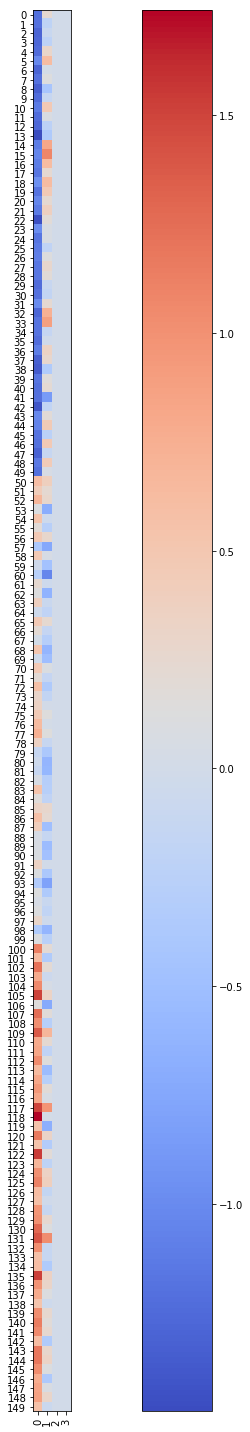

In [36]:
fig = plt.figure(figsize=(20, 20))
plt.imshow(transformed, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
plt.xticks(np.arange(len(fa.components_)), range(len(fa.components_)), rotation=90)
plt.yticks(np.arange(len(transformed)), range(len(transformed)))
plt.tight_layout()

In [37]:
corr = df.iloc[:, 0:4].corr()#相関行列
corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [38]:
c = corr.as_matrix()

In [39]:
from numpy import linalg as LA #固有値
w,v = LA.eig(c)
print(w)

[ 2.91849782  0.91403047  0.14675688  0.02071484]


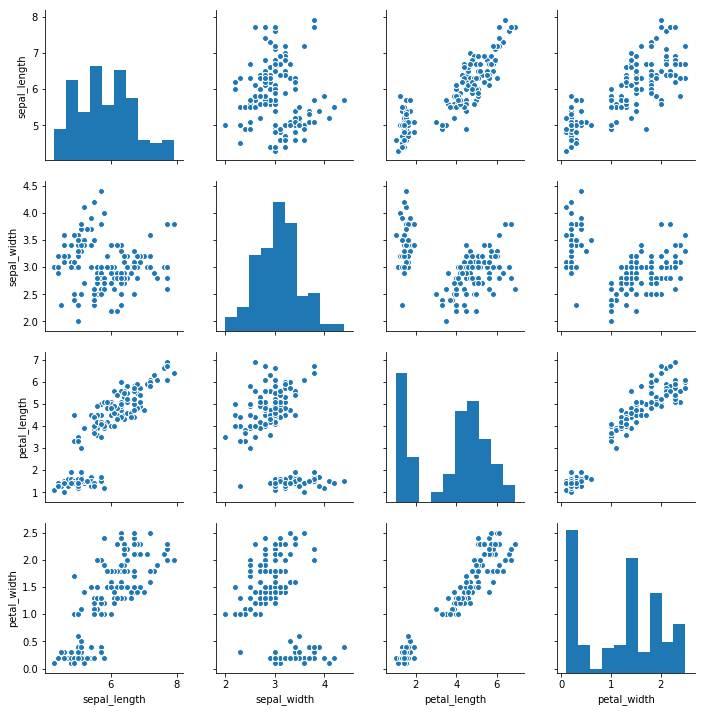

In [40]:
import seaborn as sns
iris = sns.load_dataset("iris")
sns.pairplot(iris)
plt.show()

In [44]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
